In [19]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

def perform_adfuller_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

dataset = 'C:\\Users\\Sentz\\Desktop\\Power BI Projects\\Cambiamento climatico\\Various Metrics\\ITAvgTemp.xlsx'
data = pd.read_excel(dataset)

print(data)

    ANNO   GLOBALE    ITALIA
0   1961 -0.814333 -0.282505
1   1962 -0.784333 -1.220547
2   1963 -0.724333 -1.340547
3   1964 -1.154333 -0.917155
4   1965 -1.064333 -1.417192
..   ...       ...       ...
56  2017  0.465667  0.321130
57  2018  0.265667  0.647955
58  2019  0.475667  0.581652
59  2020  0.635667  0.553158
60  2021  0.405667  0.225154

[61 rows x 3 columns]


In [15]:
data.head()

,ANNO,GLOBALE,ITALIA
0,1961,-0.814333,-0.282505
1,1962,-0.784333,-1.220547
2,1963,-0.724333,-1.340547
3,1964,-1.154333,-0.917155
4,1965,-1.064333,-1.417192


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ANNO     61 non-null     int64  
 1   GLOBALE  61 non-null     float64
 2   ITALIA   61 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


In [17]:
data.describe()

,ANNO,GLOBALE,ITALIA
count,61.000000,61.000000,61.000000
mean,1991.000000,-0.380235,-0.479464
std,17.752934,0.501293,0.656275
min,1961.000000,-1.164333,-1.663275
25%,1976.000000,-0.814333,-1.024117
50%,1991.000000,-0.424333,-0.556159
75%,2006.000000,0.035667,0.135245
max,2021.000000,0.635667,0.647955


In [18]:
# Calcoliamo la variazione percentuale

data.sort_index(inplace=True)


temperatura_iniziale = data['ITALIA'].iloc[0]  
temperatura_finale = data['ITALIA'].iloc[-1]  

temperature_change_percentage = ((temperatura_finale - temperatura_iniziale) / abs(temperatura_iniziale)) * 100


increase_message = f"Dal 1961 al 2021, le anomalie delle temperature in Italia sono salite del {temperature_change_percentage:.2f}%."

increase_message

'Dal 1961 al 2021, le anomalie delle temperature in Italia sono salite del 179.70%.'

Test di Dickey-Fuller sulla serie originale:
ADF Statistic: -0.5154981872590735
p-value: 0.8889564810129257
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997

Test di Dickey-Fuller sulla serie differenziata:
ADF Statistic: -7.551020857790354
p-value: 3.188719272891061e-11
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997


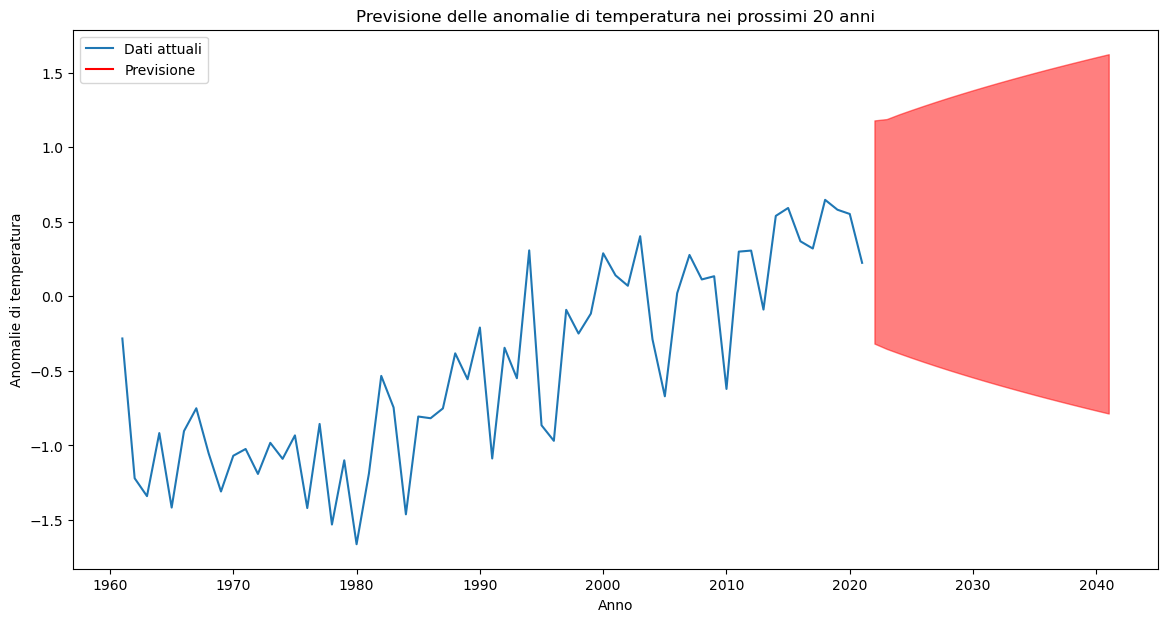

In [21]:
dataset = 'C:\\Users\\Sentz\\Desktop\\Power BI Projects\\Cambiamento climatico\\Various Metrics\\ITAvgTemp.xlsx'
data = pd.read_excel(dataset)

# Convertiamo la colonna 'ANNO' in un datetime e la impostiamo come indice
data['ANNO'] = pd.to_datetime(data['ANNO'], format='%Y')
data.set_index('ANNO', inplace=True)

# Eseguiamo il test di Dickey-Fuller per verificare la stazionarietà della serie "ITALIA"
print("Test di Dickey-Fuller sulla serie originale:")
perform_adfuller_test(data['ITALIA'])

# Differenziamo la serie e eseguiamo nuovamente il test di Dickey-Fuller
italy_temp_diff = data['ITALIA'].diff().dropna()
print("\nTest di Dickey-Fuller sulla serie differenziata:")
perform_adfuller_test(italy_temp_diff)

# Inizializziamo il modello ARIMA con i parametri (p=1, d=1, q=1)
model = ARIMA(data['ITALIA'], order=(1, 1, 1))
model_fit = model.fit()

# Previsione per i prossimi 20 anni (2022-2041)
forecast_years = 20
forecast = model_fit.get_forecast(steps=forecast_years)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=forecast_years, freq='YS')
forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=['Temperature Change'])

# Calcoliamo gli intervalli di confidenza per le previsioni
confidence_intervals = forecast.conf_int()


plt.figure(figsize=(14, 7))
plt.plot(data.index, data['ITALIA'], label='Dati attuali')
plt.plot(forecast_df.index, forecast_df['Temperature Change'], label='Previsione', color='red')
plt.fill_between(forecast_df.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='red', alpha=0.5)
plt.title('Previsione delle anomalie di temperatura nei prossimi 20 anni')
plt.xlabel('Anno')
plt.ylabel('Anomalie di temperatura')
plt.legend(loc='upper left')
plt.show()
